## Telecom Churn Study

#### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Predictive Modeling Goals

- Create a model using PCA and classification algorithm to predict Customer Churn
- Create another model to understand which features are most influential in Customer Retention or Indicators of Churn

#### Finally recommend strategies to manage customer churn based on analysis

In [209]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter


sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# load master data into python

master_data = pd.read_csv("telecom_churn_data.csv")

### Understanding Data & Data Preprocessing

In [4]:
# let's see the size of raw data available to us
master_data.shape

(99999, 226)

In [5]:
master_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# counting null values by columns

(master_data.isnull().sum()/99999)*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

In [7]:
print((master_data['total_rech_data_6'].isnull().sum()/99999)*100)
print((master_data['total_rech_data_7'].isnull().sum()/99999)*100)
print((master_data['total_rech_data_8'].isnull().sum()/99999)*100)
print((master_data['total_rech_data_9'].isnull().sum()/99999)*100)

74.84674846748467
74.42874428744287
73.66073660736608
74.07774077740777


In [8]:
print((master_data['av_rech_amt_data_6'].isnull().sum()/99999)*100)
print((master_data['av_rech_amt_data_7'].isnull().sum()/99999)*100)
print((master_data['av_rech_amt_data_8'].isnull().sum()/99999)*100)
print((master_data['av_rech_amt_data_9'].isnull().sum()/99999)*100)

74.84674846748467
74.42874428744287
73.66073660736608
74.07774077740777


##### Missing Value Treatment

- we are adopting replacing missing values with 0 in this dataset, the reason being if we see most fields which have missing value they simply says whether the customer has used that service or not, thus a missing value can be safely replaced by 0, adn not with any statistical method like mean/mode

In [9]:
# master_data_01 is the raw data after replacing missing values with 0
master_data_01 = master_data.fillna(value=0)

In [10]:
(master_data_01.isnull().sum()/99999)*100

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
                       ... 
arpu_2g_9               0.0
night_pck_user_6        0.0
night_pck_user_7        0.0
night_pck_user_8        0.0
night_pck_user_9    

In [11]:
# creating a calculated field for recharge amount data

master_data_01['total_rech_amt_data_6'] = master_data_01['total_rech_data_6']*master_data_01['av_rech_amt_data_6']
master_data_01['total_rech_amt_data_7'] = master_data_01['total_rech_data_7']*master_data_01['av_rech_amt_data_7']
master_data_01['total_rech_amt_data_8'] = master_data_01['total_rech_data_8']*master_data_01['av_rech_amt_data_8']
master_data_01['total_rech_amt_data_9'] = master_data_01['total_rech_data_9']*master_data_01['av_rech_amt_data_9']

In [12]:
# create a fild to calculate total recharge amount for both voice and data
master_data_01['Total_Rech_Amt_6'] = master_data_01['total_rech_amt_6']+master_data_01['total_rech_amt_data_6']
master_data_01['Total_Rech_Amt_7'] = master_data_01['total_rech_amt_7']+master_data_01['total_rech_amt_data_7']
master_data_01['Total_Rech_Amt_8'] = master_data_01['total_rech_amt_8']+master_data_01['total_rech_amt_data_8']
master_data_01['Total_Rech_Amt_9'] = master_data_01['total_rech_amt_9']+master_data_01['total_rech_amt_data_9']

In [13]:
# taking average of total recharge amount for Good Months - June, July

master_data_01['Av_Rech_Amt_6+7'] = round((master_data_01['Total_Rech_Amt_6']+master_data_01['Total_Rech_Amt_7'])/2,2)

In [14]:
# take 70% percentile of Av_Rech_Amt_6+7
hvc_filter = master_data_01['Av_Rech_Amt_6+7'].quantile(0.7) # 70th percentile
hvc_filter

478.0

In [15]:
# filtering the dataframe for hvc customers only
master_data_02 = master_data_01[master_data_01['Av_Rech_Amt_6+7']>hvc_filter]

In [16]:
master_data_02.shape

(29953, 235)

In [17]:
master_data_02.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Total_Rech_Amt_9,Av_Rech_Amt_6+7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,3.58,252.0,252.0,252.0,0.0,614.0,504.0,504.0,0.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0.00,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0.00,0.0,354.0,207.0,0.0,437.0,955.0,327.0,186.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.00,0.0,0.0,0.0,0.0,600.0,680.0,718.0,680.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,0.00,0.0,712.0,540.0,252.0,0.0,1166.0,979.0,504.0,583.0


In [18]:
col_lst = list(master_data_02.columns)
type(col_lst)

list

In [19]:
# voice calls columns for 9th month are one's that have non-zero value in columns ending with mou_9
voice_cols = []
for cols in col_lst:
    if (cols.startswith('total') & cols.endswith('mou_9')):
        voice_cols.append(cols)
    else:pass
voice_cols

['total_og_mou_9', 'total_ic_mou_9']

In [20]:
# data usage columns for 9th month are one's that have non-zero value in columns ending with mb_9
data_cols = []
for cols in col_lst:
    if cols.endswith('_mb_9'):
        #print(cols)
        data_cols.append(cols)
    else:pass
data_cols

['vol_2g_mb_9', 'vol_3g_mb_9']

In [21]:
master_data_02['data_usage'] = master_data_02[data_cols].sum(axis=1)

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
master_data_02['voice_usage'] = master_data_02[voice_cols].sum(axis=1)

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
master_data_02['churn']=master_data_02['data_usage']+master_data_02['voice_usage']

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
master_data_02['churn'].head()

0        0.00
7        0.00
8      177.09
21    1284.14
23     583.78
Name: churn, dtype: float64

In [25]:
master_data_02['churn'] = master_data_02['churn'].apply(lambda x : 0 if x > 0 else 1 )

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
master_data_02['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [27]:
master_data_02.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,total_rech_amt_data_8,total_rech_amt_data_9,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Total_Rech_Amt_9,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,252.0,0.0,614.0,504.0,504.0,0.0,559.0,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0.0,0.0,1580.0,790.0,3638.0,0.0,1185.0,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,207.0,0.0,437.0,955.0,327.0,186.0,696.0,0.00,177.09,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,0.0,0.0,600.0,680.0,718.0,680.0,640.0,0.00,1284.14,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,540.0,252.0,0.0,1166.0,979.0,504.0,583.0,328.67,255.11,0


In [28]:
# now that we have created the label - churn, let's drop all cloumns with suffix _9

cols = [c for c in master_data_02.columns if c[-1] == '9']

In [29]:
master_data_03 = master_data_02.drop(cols,axis=1)

In [30]:
master_data_03.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.00,177.09,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0.00,1284.14,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,328.67,255.11,0


In [31]:
master_data_03.reset_index().head()

,index,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.00,0.00,1
1,7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.00,0.00,1
2,8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.00,177.09,0
3,21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,...,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0.00,1284.14,0
4,23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,...,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,328.67,255.11,0


In [32]:
master_data_03.shape

(29953, 182)

In [33]:
# let's understand class imbalance 
master_data_03['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

#### so minority class has just 8.12% or in other words 2433 customers churned out of 29953 

In [34]:
#dropping columns with more than 90% values as 0 as they will not offer any information for prediction

row_count = master_data_03.shape[0]
columns_to_drop = []

for column, count in master_data_03.apply(lambda column: (column == 0).sum()).iteritems():
    if count / row_count >= 0.9:
        columns_to_drop.append(column)

master_data_03.drop(columns_to_drop, axis=1, inplace=True)

In [35]:
master_data_03.shape

(29953, 161)

In [36]:
#adding churn columns again as it got eleminated due to 90%+ O or non-churn label
master_data_03['churn'] = master_data_02['churn']

In [37]:
master_data_03.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.00,0.00,1
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.00,0.00,1
8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.00,177.09,0
21,7002124215,109,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,...,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0.00,1284.14,0
23,7000887461,109,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,...,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,328.67,255.11,0


In [38]:
master_data_03 =master_data_03.reset_index()

In [39]:
master_data_03.head()

,index,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.00,0.00,1
1,7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.00,0.00,1
2,8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.00,177.09,0
3,21,7002124215,109,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,...,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0.00,1284.14,0
4,23,7000887461,109,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,...,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,328.67,255.11,0


In [40]:
#let's drop a few more redundant features
# dropping circle_id as all values = 109 circle hence it has no variance
# dropping index , and Av_Rech_Amt_6+7 
master_data_03.drop(['index','circle_id'], axis=1, inplace=True)

In [41]:
master_data_03.shape

(29953, 161)

In [42]:
master_data_03.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.00,0.00,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.00,0.00,1
2,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.00,177.09,0
3,7002124215,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0.00,1284.14,0
4,7000887461,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,33.58,...,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,328.67,255.11,0


In [43]:
# renaming few columns for consistency

master_data_03.rename(columns = {'aug_vbc_3g':'vbc_3g_08','jul_vbc_3g':'vbc_3g_07','jun_vbc_3g':'vbc_3g_06','sep_vbc_3g':'vbc_3g_09' }, inplace = True) 

In [44]:
master_data_03.drop(['vbc_3g_09'], axis=1, inplace=True)

In [45]:
master_data_03.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 160 columns):
mobile_number               29953 non-null int64
last_date_of_month_6        29953 non-null object
last_date_of_month_7        29953 non-null object
last_date_of_month_8        29953 non-null object
arpu_6                      29953 non-null float64
arpu_7                      29953 non-null float64
arpu_8                      29953 non-null float64
onnet_mou_6                 29953 non-null float64
onnet_mou_7                 29953 non-null float64
onnet_mou_8                 29953 non-null float64
offnet_mou_6                29953 non-null float64
offnet_mou_7                29953 non-null float64
offnet_mou_8                29953 non-null float64
roam_ic_mou_6               29953 non-null float64
roam_ic_mou_7               29953 non-null float64
roam_ic_mou_8               29953 non-null float64
roam_og_mou_6               29953 non-null float64
roam_og_mou_7               

### Exploratory Data Analysis

In [46]:
# let's see how customers use 2g services vs 3g service
volcols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
volume_df = master_data_03[volcols]

In [47]:
df1 = volume_df.sum()

In [48]:
df1 = df1.reset_index()
df1

,index,0
0,vol_2g_mb_6,3789743.37
1,vol_2g_mb_7,3747521.69
2,vol_2g_mb_8,3171236.67
3,vol_3g_mb_6,10323714.35
4,vol_3g_mb_7,11098930.49
5,vol_3g_mb_8,10538364.56


In [49]:
df1.columns

Index(['index', 0], dtype='object')

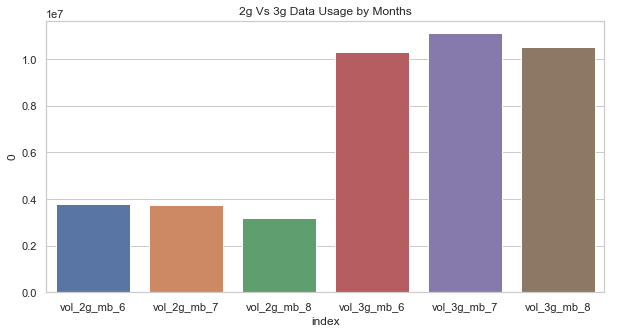

In [50]:
plt.figure(figsize=(10,5))
plt.title('2g Vs 3g Data Usage by Months')
plt.ylabel('Months_2g/3g')
plt.xlabel('Total Data Usage')
sns.barplot(x="index", y=0, data=df1)
plt.show()

##### Note
-  clearly the data usage by volume for 2g services is way less than 3g services

In [51]:
master_data_03.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,...,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,...,456.387566,528.958341,463.640890,1117.514298,1189.889132,1048.353306,1153.701715,441.321799,766.220871,0.081227
std,6.908102e+05,460.868223,480.028497,502.136278,459.853278,480.303238,458.751242,482.712621,499.138982,481.985106,...,1419.713940,1477.097887,1623.839242,1567.144166,1633.205570,1805.609831,1359.533623,988.472000,830.533204,0.273188
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.500000,0.000000,0.000000,0.000000
25%,7.000609e+09,310.142000,310.071000,231.615000,17.090000,16.040000,10.440000,71.610000,69.980000,46.760000,...,0.000000,0.000000,0.000000,547.000000,551.000000,396.000000,604.000000,0.000000,150.540000,0.000000
50%,7.001203e+09,482.354000,481.496000,427.604000,84.640000,82.830000,65.660000,222.560000,220.040000,182.840000,...,92.000000,100.000000,25.000000,788.000000,814.000000,689.000000,800.500000,0.000000,551.900000,0.000000
75%,7.001804e+09,700.240000,698.829000,661.753000,290.490000,290.540000,240.630000,487.910000,494.030000,438.860000,...,400.000000,575.000000,308.000000,1210.000000,1270.000000,1154.000000,1209.000000,564.200000,1100.870000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,105644.000000,55080.000000,89106.500000,113458.000000,56075.000000,95884.500000,61236.000000,39221.270000,12852.510000,1.000000


In [52]:
recharge_amt_voice = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
recharge_amt_data = ['total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8']
recharge_amt_total = ['Total_Rech_Amt_6','Total_Rech_Amt_7','Total_Rech_Amt_8']

In [53]:
df_rech_amt_voice = master_data_03[recharge_amt_voice]
df_rech_amt_data = master_data_03[recharge_amt_data]
df_rech_amt_total = master_data_03[recharge_amt_total]

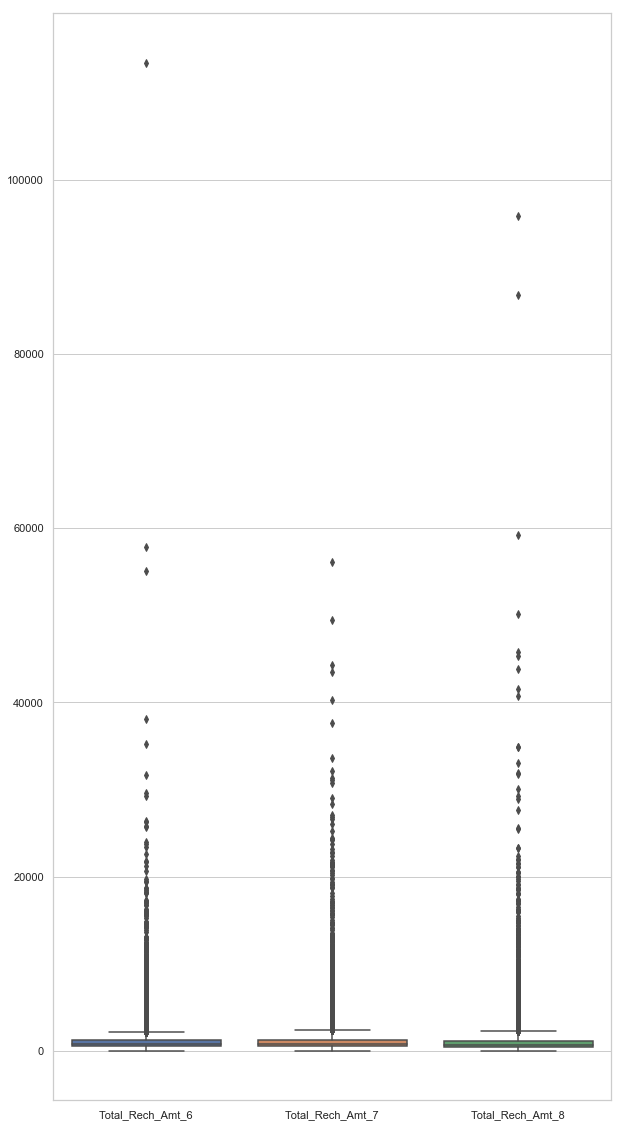

In [54]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df_rech_amt_total)
plt.show()

#### Note
- clearly the presence of outliers is displayed by above plot

In [55]:
# distribution of Total_Recharge_Amt for Churn vs No-Churn Customers
df_rech_amt_total['churn']=master_data_03['churn']


C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
df_rech_amt_total['Total_Rech_Amt'] = df_rech_amt_total['Total_Rech_Amt_6']+df_rech_amt_total['Total_Rech_Amt_7']+df_rech_amt_total['Total_Rech_Amt_8']
df_rech_amt_total['Total_Rech_Amt_GoodMonth'] = df_rech_amt_total['Total_Rech_Amt_6']+df_rech_amt_total['Total_Rech_Amt_7']
df_rech_amt_total['mobile_number'] = master_data_03['mobile_number']
df_rech_amt_total.head() 

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,churn,Total_Rech_Amt,Total_Rech_Amt_GoodMonth,mobile_number
0,614.0,504.0,504.0,1,1622.0,1118.0,7000842753
1,1580.0,790.0,3638.0,1,6008.0,2370.0,7000701601
2,437.0,955.0,327.0,0,1719.0,1392.0,7001524846
3,600.0,680.0,718.0,0,1998.0,1280.0,7002124215
4,0.0,1166.0,979.0,0,2145.0,1166.0,7000887461


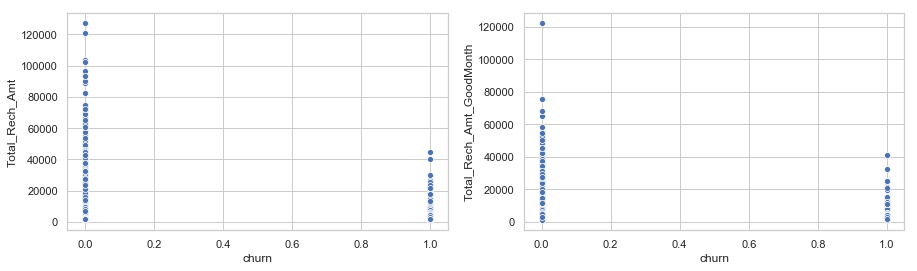

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.scatterplot(x='churn', y='Total_Rech_Amt', data=df_rech_amt_total, ax=ax[0])
sns.scatterplot(x='churn', y='Total_Rech_Amt_GoodMonth', data=df_rech_amt_total, ax=ax[1])
#plt.title('Sector Analysis')
#plt.ylabel('Count of Investments')
#plt.xlabel('Top 3 Countries')
plt.show()

In [58]:
print(df_rech_amt_total.Total_Rech_Amt[df_rech_amt_total.churn ==0].describe())
print(df_rech_amt_total.Total_Rech_Amt[df_rech_amt_total.churn ==1].describe())

count     27520.000000
mean       3431.416468
std        4097.637011
min         957.000000
25%        1778.000000
50%        2412.000000
75%        3634.000000
max      127481.000000
Name: Total_Rech_Amt, dtype: float64
count     2433.000000
mean      2499.959026
std       2495.223468
min        957.000000
25%       1340.000000
50%       1798.000000
75%       2762.000000
max      44617.000000
Name: Total_Rech_Amt, dtype: float64


#### Note:
- interesting insight from above can be drawn that customer who churn have less than 50K as Total_Rech_Amt for 3 months 
- hence, Total_Rech_Amt could be an important feature for classification 

In [59]:
master_data_03.head(3)

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Rech_Amt_6,Total_Rech_Amt_7,Total_Rech_Amt_8,Av_Rech_Amt_6+7,data_usage,voice_usage,churn
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,252.0,252.0,252.0,614.0,504.0,504.0,559.0,0.0,0.00,1
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,0.0,0.00,1
2,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0.0,177.09,0


In [60]:
# create a dataframe for voice usage 
df_voice_usage = master_data_03[['mobile_number','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                                 'total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']]

In [61]:
df_voice_usage['total_voice_usage_mou'] = (df_voice_usage['total_ic_mou_6']+df_voice_usage['total_ic_mou_7']+
                                           df_voice_usage['total_ic_mou_8']+df_voice_usage['total_og_mou_6']+
                                           df_voice_usage['total_og_mou_7']+df_voice_usage['total_og_mou_8'])

df_voice_usage['total_voice_usage_GoodMonth_mou'] = (df_voice_usage['total_ic_mou_6']+df_voice_usage['total_ic_mou_7']+
                                                     df_voice_usage['total_og_mou_6']+df_voice_usage['total_og_mou_7'])

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df_voice_usage.head()

,mobile_number,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,churn,total_voice_usage_mou,total_voice_usage_GoodMonth_mou
0,7000842753,0.00,0.00,5.44,0.00,0.00,0.00,1,5.44,0.00
1,7000701601,626.46,558.04,428.74,487.53,609.24,350.16,1,3060.17,2281.27
2,7001524846,103.86,28.49,16.54,508.36,431.66,171.56,0,1260.47,1072.37
3,7002124215,207.09,131.89,261.04,860.34,1028.79,1068.54,0,3557.69,2228.11
4,7000887461,119.58,222.89,298.33,134.38,140.04,239.48,0,1154.70,616.89


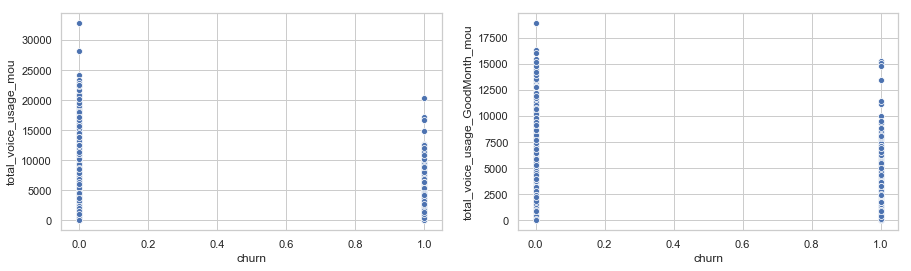

In [63]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.scatterplot(x='churn', y='total_voice_usage_mou', data=df_voice_usage, ax=ax[0])
sns.scatterplot(x='churn', y='total_voice_usage_GoodMonth_mou', data=df_voice_usage, ax=ax[1])
#plt.title('Sector Analysis')
#plt.ylabel('Count of Investments')
#plt.xlabel('Top 3 Countries')
plt.show()

In [64]:
# create a dataframe for voice usage 
df_data_usage = master_data_03[['mobile_number','vol_2g_mb_6', 'vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6',
                                'vol_3g_mb_7','vol_3g_mb_8','churn']]

df_data_usage['total_data_usage_mou'] = (df_data_usage['vol_2g_mb_6']+df_data_usage['vol_2g_mb_7']+
                                           df_data_usage['vol_2g_mb_8']+df_data_usage['vol_3g_mb_6']+
                                           df_data_usage['vol_3g_mb_7']+df_data_usage['vol_3g_mb_8'])

df_data_usage['total_data_usage_GoodMonth_mb'] = (df_data_usage['vol_2g_mb_6']+df_data_usage['vol_2g_mb_7']+
                                                     df_data_usage['vol_3g_mb_6']+df_data_usage['vol_3g_mb_7']) 

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


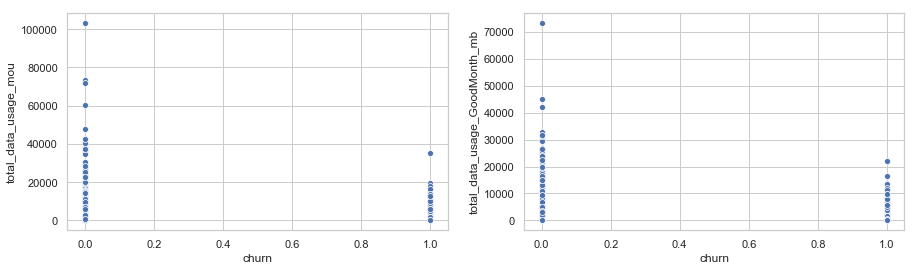

In [65]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.scatterplot(x='churn', y='total_data_usage_mou', data=df_data_usage, ax=ax[0])
sns.scatterplot(x='churn', y='total_data_usage_GoodMonth_mb', data=df_data_usage, ax=ax[1])
#plt.title('Sector Analysis')
#plt.ylabel('Count of Investments')
#plt.xlabel('Top 3 Countries')
plt.show()

#### Let's also do some counts like how the behavior of churn vs no-churn customers is different  with no. of recharges done spl in Good Months vs Action Month

In [66]:
df_num_rech = master_data_03[['mobile_number','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_data_6',
                             'total_rech_data_7','total_rech_data_8','churn']]
df_num_rech['av_rech_num_voice_Good'] = round((df_num_rech['total_rech_num_6']+df_num_rech['total_rech_num_7']/2))
df_num_rech['av_rech_num_data_Good'] = round((df_num_rech['total_rech_data_6']+df_num_rech['total_rech_data_7']/2))

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [67]:
df_num_rech.head(3)

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,churn,av_rech_num_voice_Good,av_rech_num_data_Good
0,7000842753,4,3,2,1.0,1.0,1.0,1,6.0,2.0
1,7000701601,5,5,7,0.0,0.0,0.0,1,8.0,0.0
2,7001524846,19,21,14,0.0,2.0,3.0,0,30.0,1.0


In [68]:
plt.figure(figsize=(15,5))
df_num_rech_grouped = df_num_rech.groupby('churn').agg({'av_rech_num_voice_Good':sum, 'av_rech_num_data_Good':sum,
                                                        'total_rech_num_8':sum, 'total_rech_data_8':sum})

<Figure size 1080x360 with 0 Axes>

In [69]:
df_num_rech_grouped.reset_index(inplace=True)

In [70]:
df_num_rech_grouped.head()

,churn,av_rech_num_voice_Good,av_rech_num_data_Good,total_rech_num_8,total_rech_data_8
0,0,482963.0,72842.0,286057,47601.0
1,1,47665.0,5442.0,12742,1013.0


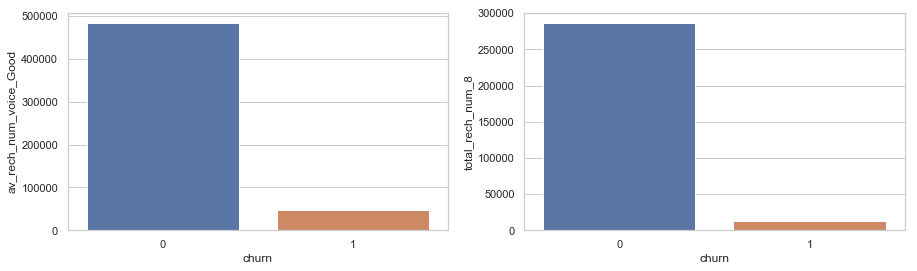

In [71]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(x='churn', y='av_rech_num_voice_Good', data=df_num_rech_grouped, ax=ax[0])
sns.barplot(x='churn', y='total_rech_num_8', data=df_num_rech_grouped, ax=ax[1])

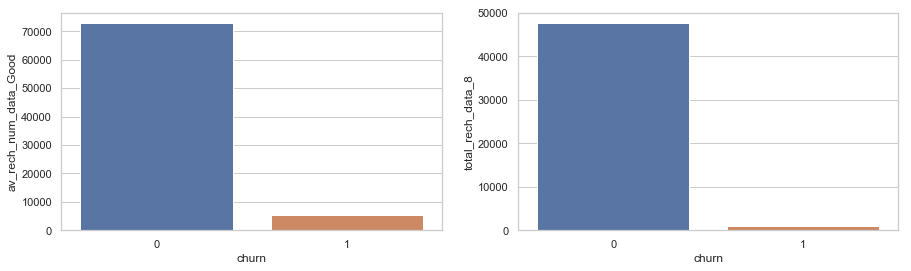

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.barplot(x='churn', y='av_rech_num_data_Good', data=df_num_rech_grouped, ax=ax[0])
sns.barplot(x='churn', y='total_rech_data_8', data=df_num_rech_grouped, ax=ax[1])

#### Note
- we can clearly see that churned customers were recharding more than double in Good months vs action month 

### Feature Engineering

- let's add a few engineered feature to our master dataframe 

In [73]:
master_data_03.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 160 columns):
mobile_number               29953 non-null int64
last_date_of_month_6        29953 non-null object
last_date_of_month_7        29953 non-null object
last_date_of_month_8        29953 non-null object
arpu_6                      29953 non-null float64
arpu_7                      29953 non-null float64
arpu_8                      29953 non-null float64
onnet_mou_6                 29953 non-null float64
onnet_mou_7                 29953 non-null float64
onnet_mou_8                 29953 non-null float64
offnet_mou_6                29953 non-null float64
offnet_mou_7                29953 non-null float64
offnet_mou_8                29953 non-null float64
roam_ic_mou_6               29953 non-null float64
roam_ic_mou_7               29953 non-null float64
roam_ic_mou_8               29953 non-null float64
roam_og_mou_6               29953 non-null float64
roam_og_mou_7               

In [74]:
master_data_03.drop(['Av_Rech_Amt_6+7','data_usage','voice_usage'],axis=1, inplace=True)

In [75]:
master_data_03.shape

(29953, 157)

In [76]:
df_num_rech.head(3)

,mobile_number,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,churn,av_rech_num_voice_Good,av_rech_num_data_Good
0,7000842753,4,3,2,1.0,1.0,1.0,1,6.0,2.0
1,7000701601,5,5,7,0.0,0.0,0.0,1,8.0,0.0
2,7001524846,19,21,14,0.0,2.0,3.0,0,30.0,1.0


In [77]:
#perc = Percentage Change
df_num_rech['perc_num_data'] = round((((df_num_rech['av_rech_num_data_Good'] - 
                                       df_num_rech['total_rech_data_8'])/df_num_rech['av_rech_num_data_Good'])*100),2)

df_num_rech['perc_num_voice'] = round((((df_num_rech['av_rech_num_voice_Good'] - df_num_rech['total_rech_num_8'])/df_num_rech['av_rech_num_voice_Good'])*100),2)

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [78]:
df_data_usage['av_volume_usage_Good_mb'] = round(((df_data_usage['vol_2g_mb_6']+df_data_usage['vol_3g_mb_6'])
                                            +(df_data_usage['vol_2g_mb_7']+df_data_usage['vol_3g_mb_7'])/2),2)


df_data_usage['perc_volume_usage_mb']= round((((df_data_usage['av_volume_usage_Good_mb']-(df_data_usage['vol_2g_mb_8']
                                                                                 +df_data_usage['vol_3g_mb_8']))
                                        /df_data_usage['av_volume_usage_Good_mb'])
                                        *100),2)                                  

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
df_voice_usage['av_voice_usage_Good_mou'] = round(((df_voice_usage['total_ic_mou_6']+df_voice_usage['total_og_mou_6'])
                                            +(df_voice_usage['total_ic_mou_7']+df_voice_usage['total_og_mou_7'])/2),2)


df_voice_usage['perc_voice_usage_mou']= round((((df_voice_usage['av_voice_usage_Good_mou']-(df_voice_usage['total_ic_mou_8']
                                                                                 +df_voice_usage['total_og_mou_8']))
                                        /df_voice_usage['av_voice_usage_Good_mou'])
                                        *100),2) 

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
df_rech_amt_total['av_rech_amt_Good'] = round((df_rech_amt_total['Total_Rech_Amt_GoodMonth']/2),2)


df_rech_amt_total['perc_rech_amt']=round((((df_rech_amt_total['av_rech_amt_Good']-df_rech_amt_total['Total_Rech_Amt_8'])
                                    /df_rech_amt_total['av_rech_amt_Good'])*100),2)

C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Swati\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [81]:
master_data_03[['av_rech_num_voice_Good', 'av_rech_num_data_Good']] = df_num_rech[['av_rech_num_voice_Good', 'av_rech_num_data_Good']]

master_data_03[['perc_num_data','perc_num_voice']] = df_num_rech[['perc_num_data','perc_num_voice']]

In [82]:
master_data_03[['total_data_usage_mou','total_data_usage_GoodMonth_mb']] = df_data_usage[['total_data_usage_mou','total_data_usage_GoodMonth_mb']]

master_data_03[['av_volume_usage_Good_mb','perc_volume_usage_mb']] = df_data_usage[['av_volume_usage_Good_mb','perc_volume_usage_mb']]

In [83]:
master_data_03[['total_voice_usage_mou','total_voice_usage_GoodMonth_mou']] = df_voice_usage[['total_voice_usage_mou','total_voice_usage_GoodMonth_mou']]

master_data_03[['av_voice_usage_Good_mou','perc_voice_usage_mou']] = df_voice_usage[['av_voice_usage_Good_mou','perc_voice_usage_mou']]


In [84]:
master_data_03[['Total_Rech_Amt','Total_Rech_Amt_GoodMonth']] = df_rech_amt_total[['Total_Rech_Amt','Total_Rech_Amt_GoodMonth']]

master_data_03[['av_rech_amt_Good','perc_rech_amt']] = df_rech_amt_total[['av_rech_amt_Good','perc_rech_amt']]


In [85]:
master_data_03.head(3)

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,av_volume_usage_Good_mb,perc_volume_usage_mb,total_voice_usage_mou,total_voice_usage_GoodMonth_mou,av_voice_usage_Good_mou,perc_voice_usage_mou,Total_Rech_Amt,Total_Rech_Amt_GoodMonth,av_rech_amt_Good,perc_rech_amt
0,7000842753,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,189.74,39.20,5.44,0.00,0.00,-inf,1622.0,1118.0,559.0,9.84
1,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.00,NaN,3060.17,2281.27,1697.63,54.12,6008.0,2370.0,1185.0,-207.00
2,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,...,553.48,97.84,1260.47,1072.37,842.30,77.67,1719.0,1392.0,696.0,53.02


#### Note

- in total we created total 16 new featrues
- here we tried to capture the essence of change in number of recharges, total amount of recharges, voice usage, and data usage from Good months(6,7) to Action month(8)

### Modelling for Prediction of Churn (1) vs No-Churn(0)

#### Modelling Goals

- Create base model - logistic regression
- create a random forest classification
- create a boosting model - xgboost
- use rfe to identify the most influential features
- use precision, recall, f1 score as evaluation metrics
- perform gridsearch for hyperparameter tuning
- use pca for dimentionality reduction
- create an xgboost on pca 
- take care of class - imbalace by undersampling/oversampling/cost-sensitive approaches

In [86]:
master_data_03.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 173 columns):
mobile_number                      29953 non-null int64
last_date_of_month_6               29953 non-null object
last_date_of_month_7               29953 non-null object
last_date_of_month_8               29953 non-null object
arpu_6                             29953 non-null float64
arpu_7                             29953 non-null float64
arpu_8                             29953 non-null float64
onnet_mou_6                        29953 non-null float64
onnet_mou_7                        29953 non-null float64
onnet_mou_8                        29953 non-null float64
offnet_mou_6                       29953 non-null float64
offnet_mou_7                       29953 non-null float64
offnet_mou_8                       29953 non-null float64
roam_ic_mou_6                      29953 non-null float64
roam_ic_mou_7                      29953 non-null float64
roam_ic_mou_8            

In [87]:
# identiy all object columns
'''object_cols = []
for cols in col_lst:
    if master_data_03['cols'].dtype == 'O':
        voice_cols.append(cols)
    else:pass
object_cols
'''
object_cols = list(master_data_03.select_dtypes(['object']).columns)

In [88]:
master_data_04 = master_data_03.drop(object_cols,axis=1)

In [89]:
# let's drop object columns as logistic regression can't handle object columns, thus dropping all date related columns
master_data_04.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,av_volume_usage_Good_mb,perc_volume_usage_mb,total_voice_usage_mou,total_voice_usage_GoodMonth_mou,av_voice_usage_Good_mou,perc_voice_usage_mou,Total_Rech_Amt,Total_Rech_Amt_GoodMonth,av_rech_amt_Good,perc_rech_amt
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,189.74,39.20,5.44,0.00,0.00,-inf,1622.0,1118.0,559.0,9.84
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.00,NaN,3060.17,2281.27,1697.63,54.12,6008.0,2370.0,1185.0,-207.00
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,553.48,97.84,1260.47,1072.37,842.30,77.67,1719.0,1392.0,696.0,53.02
3,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0.00,NaN,3557.69,2228.11,1647.77,19.31,1998.0,1280.0,640.0,-12.19
4,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,299.79,-236.88,1154.70,616.89,435.42,-23.52,2145.0,1166.0,583.0,-67.92


In [90]:
master_data_04.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 164 columns):
mobile_number                      29953 non-null int64
arpu_6                             29953 non-null float64
arpu_7                             29953 non-null float64
arpu_8                             29953 non-null float64
onnet_mou_6                        29953 non-null float64
onnet_mou_7                        29953 non-null float64
onnet_mou_8                        29953 non-null float64
offnet_mou_6                       29953 non-null float64
offnet_mou_7                       29953 non-null float64
offnet_mou_8                       29953 non-null float64
roam_ic_mou_6                      29953 non-null float64
roam_ic_mou_7                      29953 non-null float64
roam_ic_mou_8                      29953 non-null float64
roam_og_mou_6                      29953 non-null float64
roam_og_mou_7                      29953 non-null float64
roam_og_mou_8         

In [91]:
master_data_04.replace([np.inf, -np.inf], np.nan, inplace=True)

In [92]:
master_data_04.fillna(value=0, inplace=True)

In [93]:
# splitting data into train and test
X = master_data_04.drop(['churn','mobile_number'], axis=1)
y = master_data_04['churn']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [94]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,av_volume_usage_Good_mb,perc_volume_usage_mb,total_voice_usage_mou,total_voice_usage_GoodMonth_mou,av_voice_usage_Good_mou,perc_voice_usage_mou,Total_Rech_Amt,Total_Rech_Amt_GoodMonth,av_rech_amt_Good,perc_rech_amt
5067,570.375,870.036,657.427,214.18,197.56,145.96,575.96,766.01,1211.56,265.86,...,0.00,0.00,2708.81,851.24,709.76,-161.72,2601.0,1716.0,858.0,-3.15
25362,767.361,149.368,26.508,373.13,61.74,4.11,778.64,146.41,2.69,0.00,...,0.00,0.00,2302.21,2302.21,1955.16,100.00,1014.0,984.0,492.0,93.90
10076,177.840,116.427,167.601,0.98,0.26,5.09,35.91,8.58,72.63,0.00,...,577.79,29.79,533.77,329.85,246.96,17.43,3321.0,2501.0,1250.5,34.43
7679,1010.328,794.929,859.527,1530.98,1496.28,1471.41,395.84,196.81,342.94,0.00,...,0.00,0.00,6639.50,4431.00,3374.12,34.55,3072.0,2196.0,1098.0,20.22
14966,139.440,67.038,182.000,20.76,8.68,25.99,113.88,54.66,188.79,0.00,...,2209.56,39.58,812.32,425.12,314.53,-23.10,1798.0,1439.0,719.5,50.10


In [95]:
X_train.shape

(20967, 162)

In [96]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [97]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,av_volume_usage_Good_mb,perc_volume_usage_mb,total_voice_usage_mou,total_voice_usage_GoodMonth_mou,av_voice_usage_Good_mou,perc_voice_usage_mou,Total_Rech_Amt,Total_Rech_Amt_GoodMonth,av_rech_amt_Good,perc_rech_amt
0,0.025606,0.635838,0.285056,-0.098871,-0.142349,-0.190303,0.413172,0.770607,1.783571,3.106711,...,-0.560077,0.016806,0.027661,-0.614748,-0.547041,-0.662285,-0.189983,-0.217095,-0.217095,-0.063147
1,0.446040,-0.839671,-0.923819,0.250563,-0.429014,-0.506983,0.827781,-0.458354,-0.677955,-0.203259,...,-0.560077,0.016806,-0.151374,0.308301,0.505134,0.298861,-0.585730,-0.484806,-0.484806,0.922065
2,-0.812195,-0.907116,-0.653477,-0.567569,-0.558775,-0.504795,-0.691573,-0.731736,-0.535542,-0.203259,...,-0.111073,0.017542,-0.930059,-0.946435,-0.938037,-0.004371,-0.010438,0.070000,0.070000,0.318350
3,0.964614,0.482062,0.672291,2.795973,2.598761,2.768763,0.044712,-0.358387,0.014869,-0.203259,...,-0.560077,0.016806,1.758434,1.662552,1.703941,0.058501,-0.072531,-0.041546,-0.041546,0.174096
4,-0.894154,-1.008235,-0.625888,-0.524085,-0.541003,-0.458135,-0.532075,-0.640338,-0.299015,-0.203259,...,1.156983,0.017784,-0.807407,-0.885828,-0.880951,-0.153214,-0.390226,-0.318401,-0.318401,0.477425


#### Logistic Regression with RFE 

In [98]:
logreg = LogisticRegression()

In [99]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_scaled, y_train)

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Swati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [100]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 56),
 ('arpu_8', False, 18),
 ('onnet_mou_6', False, 65),
 ('onnet_mou_7', False, 38),
 ('onnet_mou_8', False, 76),
 ('offnet_mou_6', False, 104),
 ('offnet_mou_7', False, 47),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 66),
 ('roam_ic_mou_7', False, 97),
 ('roam_ic_mou_8', False, 99),
 ('roam_og_mou_6', False, 141),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 33),
 ('loc_og_t2t_mou_6', False, 42),
 ('loc_og_t2t_mou_7', False, 74),
 ('loc_og_t2t_mou_8', False, 48),
 ('loc_og_t2m_mou_6', False, 124),
 ('loc_og_t2m_mou_7', False, 82),
 ('loc_og_t2m_mou_8', False, 32),
 ('loc_og_t2f_mou_6', False, 139),
 ('loc_og_t2f_mou_7', False, 30),
 ('loc_og_t2f_mou_8', False, 31),
 ('loc_og_t2c_mou_6', False, 52),
 ('loc_og_t2c_mou_7', False, 51),
 ('loc_og_t2c_mou_8', False, 88),
 ('loc_og_mou_6', False, 95),
 ('loc_og_mou_7', False, 49),
 ('loc_og_mou_8', False, 112),
 ('std_og_t2t_mou_6', False, 64),
 ('std_og_t2t_mou_7', False, 75),


In [101]:
col = X_train_scaled.columns[rfe.support_]

In [102]:
X_train_scaled.shape

(20967, 162)

In [103]:
X_train_scaled[col].shape

(20967, 20)

In [104]:
y_train.head()

5067     0
25362    0
10076    0
7679     0
14966    0
Name: churn, dtype: int64

In [105]:
y_train.shape

(20967,)

In [106]:
y_train_lst = list(y_train)

In [107]:
X_train_sm = sm.add_constant(X_train_scaled[col])
logm2 = sm.GLM(y_train_lst,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Swati\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3989.3
Date:                Mon, 24 Feb 2020   Deviance:                       7978.6
Time:                        12:31:17   Pearson chi2:                 5.00e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2302      0.076    -55.421      0.000      -4.380      -4.081
arpu_6                 0.2361      0.032      7.493      0.000       0.174       0.298
offnet_mou_8          -0.2213      0.178     -1.243      0.214      -0.570       0.128
roam_og_mou_7          0.1785      0.025      7.199      0.000       0.130       0.227
std_og_t2m_mou_8       0.2202      0.173      1.275      0.202      -0.118       0.559
std_og_mou_8           0.5058      0.243      2.085      0.037       0.030       0.981
total_og_mou_8        -1.0221      0.261     -3.911      0.000      -1.534      -0.510
loc_ic_t2t_mou_8      -0.1793      0.426     -0.421      0.674      -1.014       0.655
loc_ic_t2m_mou_7       0.2840      0.093      3.044      0.002       0.101       0.467
loc_ic_t2m_mou_8      -0.6841      0.612     -1.117      0.264      -1.884       0.516
loc_ic_mou_8          -0.8891      0.799     -1.113      0.266      -2.455       0.677
total_ic_mou_7         0.5137      0.087      5.905      0.000       0.343       0.684
total_ic_mou_8        -1.1785      0.209     -5.650      0.000      -1.587      -0.770
total_rech_num_8      -0.3368      0.060     -5.598      0.000      -0.455      -0.219
last_day_rch_amt_8    -0.2887      0.056     -5.148      0.000      -0.399      -0.179
total_rech_data_8     -0.2976      0.090     -3.310      0.001      -0.474      -0.121
monthly_2g_8          -0.2966      0.070     -4.246      0.000      -0.433      -0.160
fb_user_8             -0.4332      0.054     -7.997      0.000      -0.539      -0.327
aon                   -0.2272      0.038     -6.023      0.000      -0.301      -0.153
vbc_3g_08             -0.3485      0.074     -4.681      0.000      -0.494      -0.203
perc_rech_amt          0.4938      0.095      5.176      0.000       0.307       0.681
======================================================================================
"""

In [108]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_logit_df = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_logit_df['mobile_number'] = y_train.index
y_train_pred_logit_df.head()

,churn,churn_Prob,mobile_number
0,0,0.045789,5067
1,0,0.620016,25362
2,0,0.022994,10076
3,0,0.011515,7679
4,0,0.005951,14966


In [109]:
y_train_pred_logit_df['predicted'] = y_train_pred_logit_df.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logit_df.head()

,churn,churn_Prob,mobile_number,predicted
0,0,0.045789,5067,0
1,0,0.620016,25362,1
2,0,0.022994,10076,0
3,0,0.011515,7679,0
4,0,0.005951,14966,0


In [110]:
# Confusion matrix 
confusion_logit = metrics.confusion_matrix(y_train_pred_logit_df.churn, y_train_pred_logit_df.predicted )
print(confusion_logit)

[[19016   199]
 [ 1283   469]]


In [111]:
#training accuracy on logistic regression classification
print('Train_logit_Accuracy: %.3f' % accuracy_score(y_train_pred_logit_df.churn, y_train_pred_logit_df.predicted))
print('Train_logit_Precision: %.3f' % precision_score(y_train_pred_logit_df.churn, y_train_pred_logit_df.predicted))
print('Train_logit_Recall: %.3f' % recall_score(y_train_pred_logit_df.churn, y_train_pred_logit_df.predicted))
print('Train_logit_F-measure: %.3f' % f1_score(y_train_pred_logit_df.churn, y_train_pred_logit_df.predicted))

Train_logit_Accuracy: 0.929
Train_logit_Precision: 0.702
Train_logit_Recall: 0.268
Train_logit_F-measure: 0.388


In [112]:
# Making predictions on the test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [113]:
X_test_sm = sm.add_constant(X_test_scaled[col])
y_test_pred = res.predict(X_test_sm)

C:\Users\Swati\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [114]:
type(y_test_pred)

pandas.core.series.Series

In [115]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_logit_df = pd.DataFrame({'churn':y_test.values, 'churn_Prob':y_test_pred})
y_test_pred_logit_df['mobile_number'] = y_test.index
y_test_pred_logit_df.head()

,churn,churn_Prob,mobile_number
0,0,0.327341,14483
1,0,0.000331,8922
2,0,0.002087,15014
3,0,0.009888,19846
4,0,0.063951,27504


In [116]:
y_test_pred_logit_df['predicted'] = y_test_pred_logit_df.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_logit_df.head()

,churn,churn_Prob,mobile_number,predicted
0,0,0.327341,14483,0
1,0,0.000331,8922,0
2,0,0.002087,15014,0
3,0,0.009888,19846,0
4,0,0.063951,27504,0


In [117]:
#test accuracy on logistic regression classification
print('Test_logit_Accuracy: %.3f' % accuracy_score(y_test_pred_logit_df.churn, y_test_pred_logit_df.predicted))
print('Test_logit_Precision: %.3f' % precision_score(y_test_pred_logit_df.churn, y_test_pred_logit_df.predicted))
print('Test_logit_Recall: %.3f' % recall_score(y_test_pred_logit_df.churn, y_test_pred_logit_df.predicted))
print('Test_logit_F-measure: %.3f' % f1_score(y_test_pred_logit_df.churn, y_test_pred_logit_df.predicted))

Test_logit_Accuracy: 0.933
Test_logit_Precision: 0.657
Test_logit_Recall: 0.239
Test_logit_F-measure: 0.351


#### Note:
- overall train and test metrics are pretty similar so we can say that there is not much overfitting happening with this model

#### Ranfom Forest Classifier

In [118]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [119]:
# Fit the grid search to the data
grid_search_rf.fit(X_train[col], y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   33.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [120]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf.best_score_,'using',grid_search_rf.best_params_)

We can get accuracy of 0.9406209758191445 using {'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 400}


In [121]:
# fitting the model with best params

rf_best_param = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,)

In [122]:
rf_best_param.fit(X_train[col],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
# predict
rf_predictions = rf_best_param.predict(X_test[col])

In [124]:
#test accuracy on logistic regression classification
print('Test_rf_Accuracy: %.3f' % accuracy_score(y_test, rf_predictions))
print('Test_rf_Precision: %.3f' % precision_score(y_test, rf_predictions))
print('Test_rf_Recall: %.3f' % recall_score(y_test, rf_predictions))
print('Test_rf_F-measure: %.3f' % f1_score(y_test, rf_predictions))

Test_rf_Accuracy: 0.948
Test_rf_Precision: 0.768
Test_rf_Recall: 0.443
Test_rf_F-measure: 0.562


In [125]:
# feature importance
importance_rf = dict(zip(X_train.columns, rf_best_param.feature_importances_))
importance_rf

{'arpu_6': 0.008569848095940562,
 'arpu_7': 0.051045281172847484,
 'arpu_8': 0.005558586466106765,
 'onnet_mou_6': 0.004639270937804291,
 'onnet_mou_7': 0.00724309625329556,
 'onnet_mou_8': 0.06719610240720647,
 'offnet_mou_6': 0.07040956862242242,
 'offnet_mou_7': 0.013820563917305398,
 'offnet_mou_8': 0.09144154168010855,
 'roam_ic_mou_6': 0.1784862554694966,
 'roam_ic_mou_7': 0.015454919022401693,
 'roam_ic_mou_8': 0.18813492265926662,
 'roam_og_mou_6': 0.01630315331875249,
 'roam_og_mou_7': 0.04845996529708196,
 'roam_og_mou_8': 0.04218150360555745,
 'loc_og_t2t_mou_6': 0.00033742826015848224,
 'loc_og_t2t_mou_7': 0.039962523083000676,
 'loc_og_t2t_mou_8': 0.004078869519081665,
 'loc_og_t2m_mou_6': 0.007603853584472664,
 'loc_og_t2m_mou_7': 0.13907274662769223}

#### Note:
Test accuracy improved with Random Forest from Logistic and overall precision, recall numbers also improved

#### XgBoost Classifier

In [126]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [127]:
#fitting xgb classifier on training data
model_cv.fit(X_train[col], y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   40.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [128]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.893034,0.053316,0.041656,0.007362,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.901132,0.900355,0.906081,0.902523,0.002536,3,0.946542,0.945813,0.943500,0.945285,0.001297
1,2.297988,0.010781,0.036459,0.007357,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.902881,0.901827,0.909022,0.904577,0.003173,2,0.954235,0.952373,0.950567,0.952392,0.001498
2,2.228644,0.026579,0.041642,0.007381,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.904643,0.904313,0.909799,0.906252,0.002512,1,0.953533,0.953753,0.952592,0.953293,0.000504
3,1.812102,0.012760,0.041643,0.007355,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.876226,0.875616,0.877851,0.876564,0.000944,6,0.950803,0.951147,0.950033,0.950661,0.000466
4,2.296344,0.012736,0.046851,0.000019,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.891168,0.888019,0.887453,0.888880,0.001634,5,0.970624,0.970639,0.970918,0.970727,0.000135
5,2.254684,0.007360,0.041652,0.007360,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.900965,0.894205,0.898300,0.897824,0.002780,4,0.976502,0.977426,0.977565,0.977164,0.000472


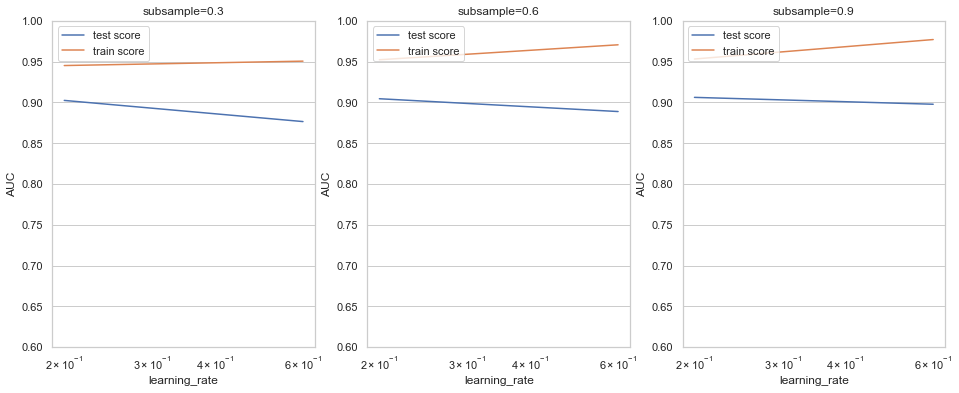

In [129]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [130]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train[col], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [131]:
# predict
y_pred_xgb = model.predict(X_test[col])
y_pred_xgb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [132]:
#test accuracy on logistic regression classification
print('Test_Xgb_Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb))
print('Test_Xgb_Precision: %.3f' % precision_score(y_test, y_pred_xgb))
print('Test_Xgb_Recall: %.3f' % recall_score(y_test, y_pred_xgb))
print('Test_Xgb_F-measure: %.3f' % f1_score(y_test, y_pred_xgb))

Test_Xgb_Accuracy: 0.949
Test_Xgb_Precision: 0.749
Test_Xgb_Recall: 0.488
Test_Xgb_F-measure: 0.591


In [133]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'arpu_6': 0.018382538,
 'arpu_7': 0.022026371,
 'arpu_8': 0.020357825,
 'onnet_mou_6': 0.008594745,
 'onnet_mou_7': 0.012520923,
 'onnet_mou_8': 0.027145032,
 'offnet_mou_6': 0.015421351,
 'offnet_mou_7': 0.027036041,
 'offnet_mou_8': 0.038170934,
 'roam_ic_mou_6': 0.102992535,
 'roam_ic_mou_7': 0.02027507,
 'roam_ic_mou_8': 0.35533208,
 'roam_og_mou_6': 0.017695062,
 'roam_og_mou_7': 0.062579125,
 'roam_og_mou_8': 0.013739337,
 'loc_og_t2t_mou_6': 0.019506743,
 'loc_og_t2t_mou_7': 0.119378105,
 'loc_og_t2t_mou_8': 0.014685859,
 'loc_og_t2m_mou_6': 0.028787324,
 'loc_og_t2m_mou_7': 0.055373088}

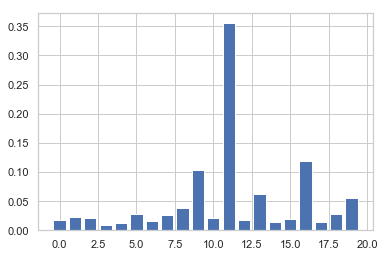

In [134]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### PCA and XGBoost Classification

In [183]:
pca = PCA(svd_solver='randomized', random_state=42)

In [184]:
#Doing the PCA on the train data
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [190]:
colnames = list(X_train_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.027099,0.155264,arpu_6
1,-0.025656,0.165291,arpu_7
2,-0.015263,0.163233,arpu_8
3,-0.081782,0.072269,onnet_mou_6
4,-0.083878,0.079956,onnet_mou_7


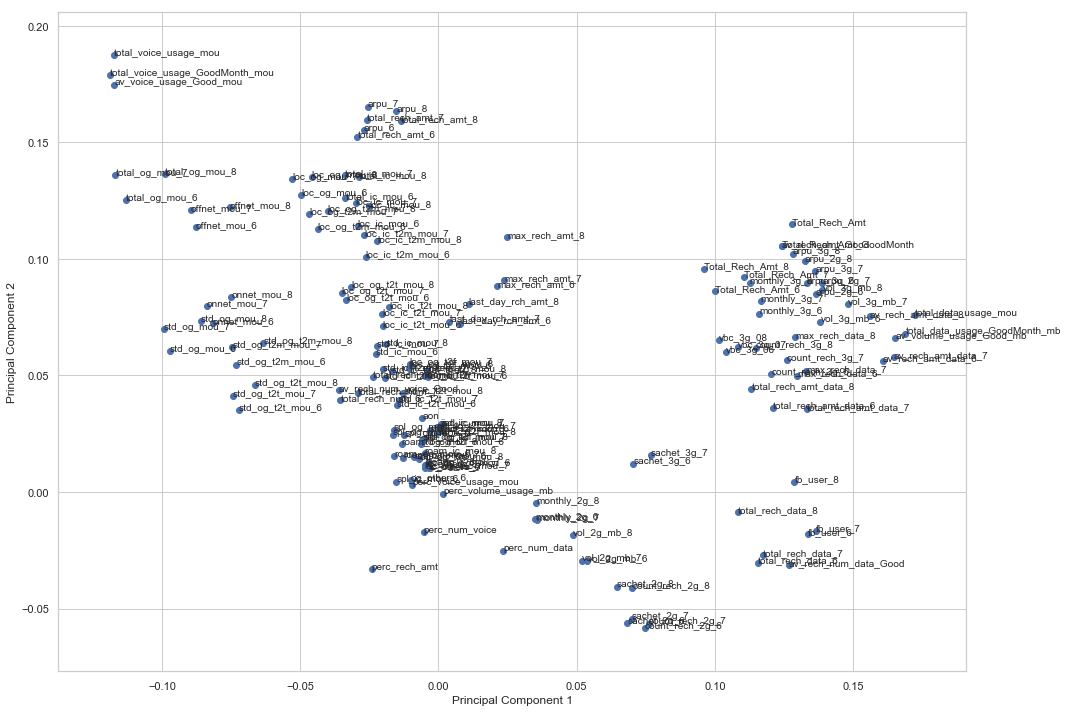

In [191]:
%matplotlib inline
fig = plt.figure(figsize = (15,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [192]:
pca.explained_variance_ratio_

array([1.37838746e-01, 1.02274471e-01, 6.92812636e-02, 5.87134515e-02,
       3.65506268e-02, 3.14104978e-02, 2.96145603e-02, 2.55274627e-02,
       2.42098587e-02, 2.10869546e-02, 2.08906226e-02, 1.81101115e-02,
       1.74482547e-02, 1.72793868e-02, 1.69885659e-02, 1.61468877e-02,
       1.52571826e-02, 1.48532779e-02, 1.41176303e-02, 1.32839934e-02,
       1.24394344e-02, 1.06342739e-02, 1.05374584e-02, 1.03818769e-02,
       1.01346903e-02, 9.31874004e-03, 8.53286446e-03, 7.62753932e-03,
       7.33433173e-03, 7.18107884e-03, 6.98275806e-03, 6.66013119e-03,
       6.45789521e-03, 6.36765122e-03, 6.24638621e-03, 6.11894293e-03,
       5.82424508e-03, 5.78294503e-03, 5.62328219e-03, 5.29860703e-03,
       5.22407252e-03, 5.15146560e-03, 4.97217941e-03, 4.88236486e-03,
       4.67304152e-03, 4.55886963e-03, 4.51645131e-03, 4.20217096e-03,
       3.88638046e-03, 3.81491079e-03, 3.70148117e-03, 3.45686815e-03,
       3.11393066e-03, 3.05876302e-03, 2.94085789e-03, 2.92059667e-03,
      

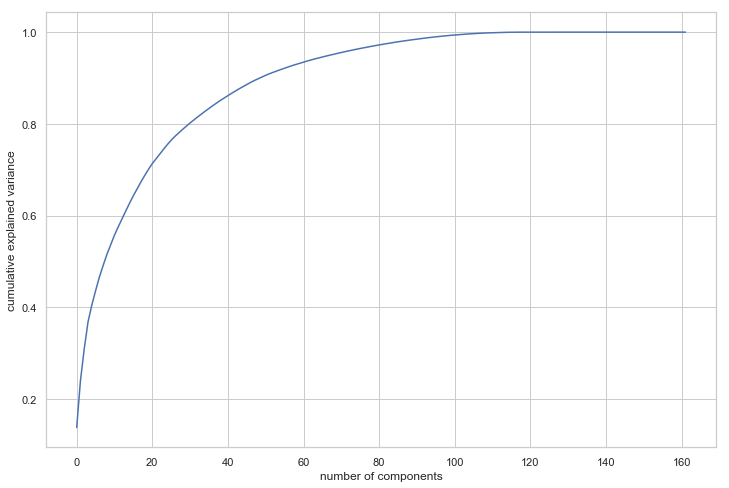

In [193]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 -  looks like 50-60 components are enough to explain 90% of variance

In [194]:
# directly allowing algorithm to chose features to explain 90% variance
pca_90 = PCA(0.95)

In [195]:
train_pca_90 = pca_90.fit_transform(X_train_scaled)

In [196]:
train_pca_90.shape

(20967, 69)

- So, 50 principal components are enough to explain 90% variance in data
- let's now fit an xgb classifier on top of it

In [197]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model_pca = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_pca = GridSearchCV(estimator = xgb_model_pca, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [198]:
#fitting xgb classifier on training data
model_cv_pca.fit(train_pca_90, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [199]:
# cv results
cv_results_pca = pd.DataFrame(model_cv_pca.cv_results_)
cv_results_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.802666,0.261649,0.046874,0.000016,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.883577,0.881688,0.885504,0.883590,0.001558,3,0.940376,0.943998,0.939563,0.941312,0.001928
1,7.742987,0.019479,0.046842,0.000013,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.887834,0.884630,0.896022,0.889495,0.004797,2,0.948226,0.946953,0.945192,0.946790,0.001244
2,8.441426,0.052531,0.041635,0.007373,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.891498,0.889548,0.891670,0.890905,0.000962,1,0.948799,0.948887,0.946981,0.948222,0.000878
3,5.472680,0.029472,0.046873,0.000016,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.833942,0.832055,0.828264,0.831420,0.002361,6,0.949187,0.948173,0.946050,0.947803,0.001307
4,7.742968,0.019484,0.046841,0.000017,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.861233,0.852792,0.864538,0.859521,0.004946,5,0.976171,0.974879,0.976130,0.975727,0.000600
5,8.445965,0.032050,0.046874,0.000014,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.873806,0.862338,0.867465,0.867870,0.004691,4,0.982974,0.982500,0.981140,0.982205,0.000777


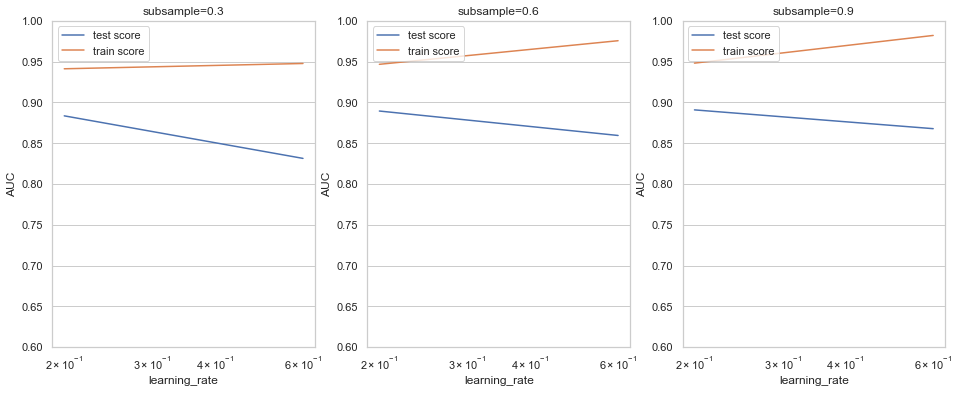

In [200]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results_pca[cv_results_pca['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [202]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params_final = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model_pca_xgb_final = XGBClassifier(params = params_final)
model_pca_xgb_final.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [203]:
# predict
y_pred_xgb_pca_final = model_pca_xgb_final.predict(X_test_scaled)

In [204]:
#test accuracy on logistic regression classification
print('Test_Xgb_Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb_pca_final))
print('Test_Xgb_Precision: %.3f' % precision_score(y_test, y_pred_xgb_pca_final))
print('Test_Xgb_Recall: %.3f' % recall_score(y_test, y_pred_xgb_pca_final))
print('Test_Xgb_F-measure: %.3f' % f1_score(y_test, y_pred_xgb_pca_final))

Test_Xgb_Accuracy: 0.948
Test_Xgb_Precision: 0.736
Test_Xgb_Recall: 0.499
Test_Xgb_F-measure: 0.595


- So, by Applying PCA for dimentionality reduction we are able to achieve ~ 95% accuracy
- Also, above model is able to capture 50% of customer attrition alongwith 74% precision which is pretty good, comparing the class imbalance in the data 

#### Class Imbalance handling (Over-sampling) + PCA+Random Forest for Attrition Classification

- let's apply oversampling the minority class and then apply pca and xgboost to see if our precision, recall numbers improve

In [205]:
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)

In [206]:
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
#print(Counter(y_over))


In [210]:
print(Counter(y_over))

Counter({0: 27520, 1: 13760})


In [211]:
# splitting into train, test again for oversampled data
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, train_size=0.7, test_size=0.3, random_state=100)

In [213]:
# Create the parameter grid based on the results of random search 
param_grid_over = {
    'max_depth': [4,8,10,15],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
}
# Create a based model
rf_over = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_over = GridSearchCV(estimator = rf_over, param_grid = param_grid_over, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [214]:
# Fit the grid search to the data
grid_search_rf_over.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [215]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_rf_over.best_score_,'using',grid_search_rf_over.best_params_)

We can get accuracy of 0.893095691296072 using {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [216]:
# fitting the model with best params

rf_best_param_over = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,)

In [217]:
rf_best_param_over.fit(X_train_over,y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [218]:
# predict
rf_predictions_over = rf_best_param_over.predict(X_test_over)

In [219]:
#test accuracy on logistic regression classification
print('Test_rf_Accuracy: %.3f' % accuracy_score(y_test_over, rf_predictions_over))
print('Test_rf_Precision: %.3f' % precision_score(y_test_over, rf_predictions_over))
print('Test_rf_Recall: %.3f' % recall_score(y_test_over, rf_predictions_over))
print('Test_rf_F-measure: %.3f' % f1_score(y_test_over, rf_predictions_over))

Test_rf_Accuracy: 0.893
Test_rf_Precision: 0.885
Test_rf_Recall: 0.781
Test_rf_F-measure: 0.830


In [220]:
# feature importance
importance_rf_over = dict(zip(X_train_over.columns, rf_best_param_over.feature_importances_))
importance_rf_over

{'arpu_6': 0.00039331564303789787,
 'arpu_7': 0.0011160962706490065,
 'arpu_8': 0.012139610650616415,
 'onnet_mou_6': 0.0006466875103080394,
 'onnet_mou_7': 0.001046977933394249,
 'onnet_mou_8': 0.0009877032022285914,
 'offnet_mou_6': 0.0003888786973205153,
 'offnet_mou_7': 0.0008573729756660462,
 'offnet_mou_8': 0.005317309953912345,
 'roam_ic_mou_6': 0.0008058829549608251,
 'roam_ic_mou_7': 0.003757971310274586,
 'roam_ic_mou_8': 0.043696755837255026,
 'roam_og_mou_6': 0.0011090927668460607,
 'roam_og_mou_7': 0.0027243071631631705,
 'roam_og_mou_8': 0.052133214501226696,
 'loc_og_t2t_mou_6': 0.00040516625956243566,
 'loc_og_t2t_mou_7': 0.0005468994842968617,
 'loc_og_t2t_mou_8': 0.026918759987077663,
 'loc_og_t2m_mou_6': 0.0006479831428727793,
 'loc_og_t2m_mou_7': 0.0005219358592330925,
 'loc_og_t2m_mou_8': 0.017748703284103117,
 'loc_og_t2f_mou_6': 0.0002924166696624905,
 'loc_og_t2f_mou_7': 0.0007317651499384802,
 'loc_og_t2f_mou_8': 0.0073262417925716115,
 'loc_og_t2c_mou_6': 0.00

In [226]:
#sorted_importance_rf_over = collections.OrderedDict(sorted_x)
sorted_importance_rf_over = sorted(importance_rf_over.items(), key=lambda kv: kv[1], reverse=True)
sorted_importance_rf_over[:25]

[('total_ic_mou_8', 0.0843504509513786),
 ('perc_voice_usage_mou', 0.0814818380707722),
 ('perc_rech_amt', 0.07022937521988859),
 ('loc_ic_t2m_mou_8', 0.0702102712588035),
 ('Total_Rech_Amt_8', 0.05835929165387532),
 ('loc_ic_mou_8', 0.053655365740115674),
 ('roam_og_mou_8', 0.052133214501226696),
 ('roam_ic_mou_8', 0.043696755837255026),
 ('total_rech_amt_8', 0.036003106518280294),
 ('fb_user_8', 0.03587663427719415),
 ('loc_ic_t2t_mou_8', 0.028842369503169638),
 ('loc_og_t2t_mou_8', 0.026918759987077663),
 ('last_day_rch_amt_8', 0.026794804058284424),
 ('total_rech_data_8', 0.026541509070318003),
 ('max_rech_amt_8', 0.024813536761277944),
 ('loc_og_t2m_mou_8', 0.017748703284103117),
 ('loc_og_mou_8', 0.017247166373395007),
 ('perc_num_voice', 0.015743200938459708),
 ('av_rech_amt_data_8', 0.015259082386082307),
 ('count_rech_2g_8', 0.013408381486696992),
 ('arpu_8', 0.012139610650616415),
 ('max_rech_data_8', 0.011277426980933791),
 ('std_ic_mou_8', 0.010355945933584654),
 ('total_re

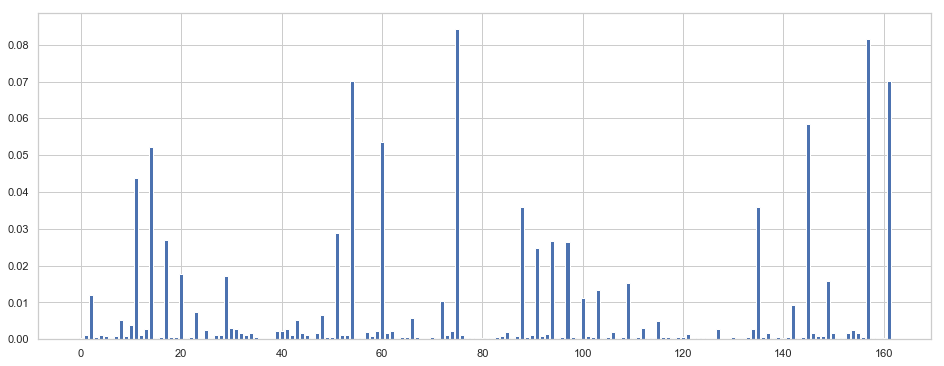

In [232]:
# plot
plt.figure(figsize=(16,6))
plt.bar(range(len(rf_best_param_over.feature_importances_)), rf_best_param_over.feature_importances_)
plt.show()

#### Note:
-  By applying Oversampling as mecahnism to treat acute class imbalance problem, our precision, recall metrices have vastly improved
- we have also listed Top 25 features by significance in the model

###  Summary

- Since we are dealing with Class-imbalance problem, it is observed that oversampling of minority class greatly improves Precision -  Recall metrices
- With Oversampling we are able to achieve 90% accuracy, 88% Precision, 78% Recall
- The following actions drives the whole telecom data with the possible reasons for churning
       - Users minutes of usage within and outside network influeces churning
       - Percentage change in minutes of usage from good to action months are solid indicator of churn
       - Percentage change in recharge amount also indicates change in behavior
       - Users change in minutes usage in roaming may suggest that they might discontinue
       - Users have high outgoing local calls within and outside the same network 
       - Users have opted for fb packs - High charges of fb packs can drive the user to different operator
       - Users use 2g - Low speed of 2g or high charges for internet packs
      
#### Strategies to reduce churn:
 - Give offers and discounts to users on the usage basis
 - Provide special packs and discounts for users with high call numbers within the same network
 - Provide special packs and discounts for users with high call numbers outside the network
 - Provide good data packs for the users of high usage
 - Make sure that the customer service is good
